## Experimenting with neural networks with multiple hidden layers

In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from collections import OrderedDict

In [2]:
def make_net(w, d):
#     Input layer
    od = OrderedDict([('lin1', nn.Linear(1, w)), ('relu1', nn.ReLU())])
#     Middle layers
    for l in range(d-1):
        od[f"lin{l+2}"] = nn.Linear(w, w)
        od[f"relu{l+2}"] = nn.ReLU()
#     Output
    od['out'] = nn.Linear(w, 1)
    
    return od

In [3]:
# Create neural network model class
class NeuralNetwork(nn.Module):
    def __init__(self, net):
        super(NeuralNetwork, self).__init__()
        self.seq_modules = nn.Sequential(net)

    def forward(self, x):
        logits = self.seq_modules(x)
        return logits

In [4]:
X = torch.linspace(-1, 1, 101).reshape((101, 1))

In [5]:
def plot_samps(w, d, n_s):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 4))
    ax = [ax1, ax2, ax3]
    for i in range(n_s):
        for j in range(3):
            net = make_net(2**(j+1), d)
            model = NeuralNetwork(net)
            y = model(X)
            ax[j].plot(X.detach(), y.detach())
            ax[j].set_title(f"w = {2**(j+2)}, d = {d}")
    plt.show()

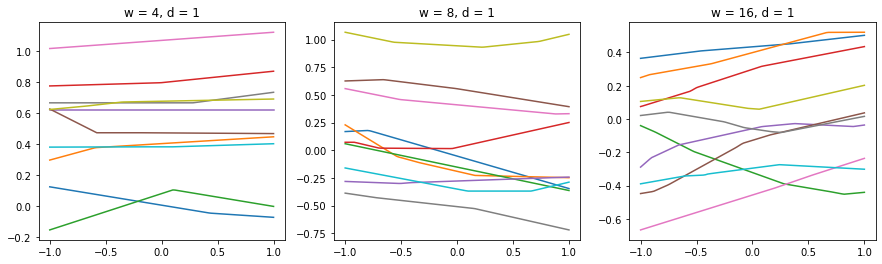

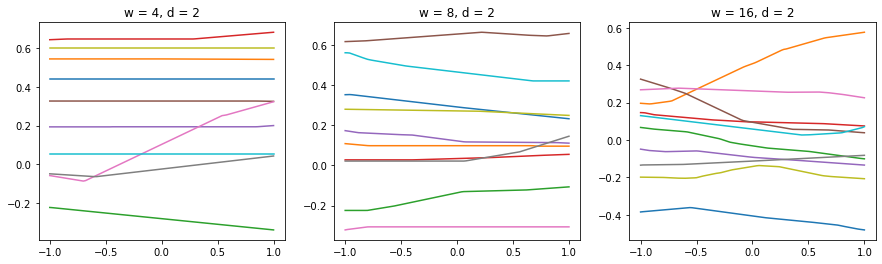

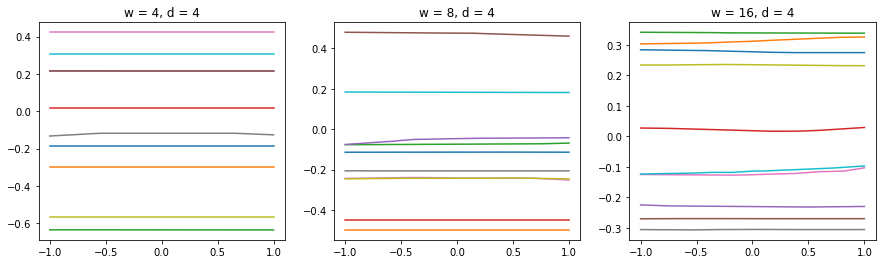

In [6]:
plot_samps(w=50, d=1, n_s=10)
plot_samps(w=50, d=2, n_s=10)
plot_samps(w=50, d=4, n_s=10)

The default parameter initialization for nn.Linear uses a $U\left(-\sqrt{k}, \sqrt{k}\right)$ distribution, where $k = \frac{1}{in\_features}$. So the variance of each parameter is 

$$\frac{1}{12} \left\{\sqrt{k} - \left(-\sqrt{k}\right)\right\}^2$$
$$= \frac{1}{12} \left(2 \sqrt{k}\right)^2$$
$$= \frac{k}{3},$$

which is inversely proportional to the number of input features.

For a constant input $x$, the variance of an output from the linear layer is then

$$(x^2 in\_features + 1) \frac{k}{3}$$
$$= \frac{k + x^2}{3},$$

which is $\Theta(c)$ w.r.t. the number of input features.

What happens after the ReLU?

For one input $x$, and one neuron with weight $w$, and bias $b$, the output is

$$y = \left\{
\begin{array}{ll}
      0 & w x + b \le 0 \\
      w x + b & w x + b > 0 \\
\end{array} 
\right.$$

and the variance is 

$$Var(y) = E(y^2) - E(y)^2$$

$$= E\{(wx + b)^2|w x + b > 0\} - E(w x + b|w x + b > 0)^2$$

$$= E\{(wx + b)^2\} - E(w x + b|w x + b > 0)^2$$

$$E\{(wx + b)^2\} = E(w^2 x^2) + E(2wx) + E(b^2)$$

$$= x^2 E(w^2) + 2x E(w) + E(b^2)$$

$$= x^2 Var(w) + Var(b)$$

$$= (x^2 + 1) \frac{k}{3}$$

for the parameter intialisation above.

$$E(w x + b|w x + b > 0) = \frac{f(wx + b)}{f(1)},$$

$$f(x') = \left\{
\begin{array}{ll}
      \int_{-wx}^{\sqrt{k}} \int_{-bx^{-1}}^{\sqrt{k}} x'dwdb & x > 0 \\
      \int_{-wx}^{\sqrt{k}} \int_{\sqrt{k}}^{-bx^{-1}} x'dwdb & x < 0 \\
      \int_0^{\sqrt{k}} x' db & x = 0 \\      
\end{array} 
\right.$$

$$= \int y^2 f(y) dy - \left(\int y f(y) dy\right)^2$$
$$= \int_{wx + b > 0} (wx + b)^2 f(wx + b) d(wx + b) - \left(\int_{wx + b > 0} (wx + b) f(wx + b) d(wx + b)\right)^2$$

$$= $$



$$= \int_{-\sqrt{k}}^{\sqrt{k}} \int (wx + b)^2 f(wx + b) \frac{dy}{dw} \frac{dy}{db} dw db - \left(\int \int y f(w) f(b) dw db\right)^2$$

$$f(y) = \frac{dF(y)}{dy} = \frac{dF(wx + b)}{d(wx + b)} = $$


...  Anyway it seems like it normalises it somehow, so that the variance of each function point is constant over width and depth, but the covariance of nearby points increases with depth (the length-scale of the covariance function increases).